# **🔍 Exploratory Data Analysis in Python for the Retail Sector 📈**
  ### — *Data Science Academy*

## 1. Imports

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## 2. Loading the data

In [ ]:
# Load the dataset
df_dsa = pd.read_csv('dataset.csv')

In [ ]:
# Shape
df_dsa.shape

(9700, 11)

In [ ]:
df_dsa = df_dsa.rename(columns={
    'ID_Pedido': 'OrderId',
    'Data_Pedido': 'OrderDate',
    'ID_Cliente': 'ClientId',
    'Segmento': 'Segment',
    'Pais': 'Country',
    'Cidade': 'City',
    'Estado': 'State',
    'ID_Produto': 'ProductId',
    'Categoria': 'Category',
    'SubCategoria': 'Subcategory',
    'Valor_Venda': 'SaleValue'
})

In [ ]:
# Sample of the data
df_dsa.head()

,OrderId,OrderDate,ClientId,Segment,Country,City,State,ProductId,Category,Subcategory,SaleValue
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [ ]:
# Sample of the data
df_dsa.tail()

,OrderId,OrderDate,ClientId,Segment,Country,City,State,ProductId,Category,Subcategory,SaleValue
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## 3. Exploratory Analysis

In [ ]:
# Columns from the dataset
df_dsa.columns

Index(['OrderId', 'OrderDate', 'ClientId', 'Segment', 'Country', 'City',
       'State', 'ProductId', 'Category', 'Subcategory', 'SaleValue'],
      dtype='object')

In [ ]:
## Return data types of each column
df_dsa.dtypes

,0
OrderId,object
OrderDate,object
ClientId,object
Segment,object
Country,object
City,object
State,object
ProductId,object
Category,object
Subcategory,object


In [ ]:
# Bring statatistic measures about the value column
df_dsa['SaleValue'].describe()

,SaleValue
count,9700.000000
mean,230.469892
std,627.504252
min,0.444000
25%,17.248000
50%,54.272000
75%,209.932500
max,22638.480000


In [ ]:
# Verify for duplicates
df_dsa[df_dsa.duplicated()]

,OrderId,OrderDate,ClientId,Segment,Country,City,State,ProductId,Category,Subcategory,SaleValue


In [ ]:
# Verify if is there any null value
df_dsa.isnull().sum()

,0
OrderId,0
OrderDate,0
ClientId,0
Segment,0
Country,0
City,0
State,0
ProductId,0
Category,0
Subcategory,0


In [ ]:
df_dsa.head()

,OrderId,OrderDate,ClientId,Segment,Country,City,State,ProductId,Category,Subcategory,SaleValue
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680



###**Which City Has the Highest Sales Value for Products in the 'Office Supplies' Category?**

In [ ]:
cities_salesvalue = df_dsa.loc[df_dsa['Category'] == 'Office Supplies', ['City', 'SaleValue']]
city_biggest_salesvalue = cities_salesvalue.groupby('City')['SaleValue'].sum().sort_values(ascending=False)
city = city_biggest_salesvalue.idxmax()

print(f'The city with the highest sales value was {city}.')
print('Check out the ranking below:')
city_biggest_salesvalue

The city with the highest sales value was New York City.
Check out the ranking below:


,SaleValue
City,
New York City,68362.814
Los Angeles,47098.100
San Francisco,41771.198
Seattle,34856.878
Philadelphia,29313.687
...,...
Ormond Beach,2.808
Pensacola,2.214
Jupiter,2.064


##**What is the Total Sales by Order Date?**


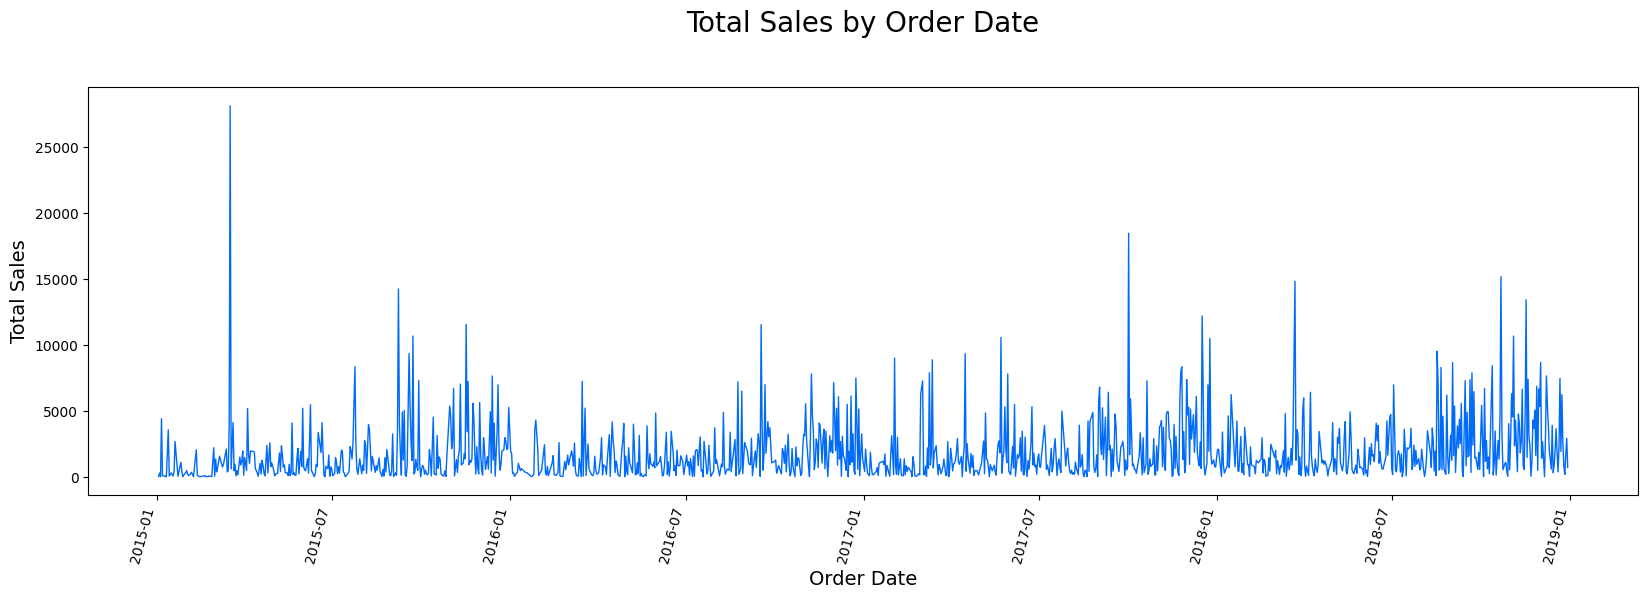

In [ ]:
df_dsa['OrderDate'] = pd.to_datetime(df_dsa['OrderDate'], format='%d/%m/%Y') # convert to date
df_date_sales = df_dsa.groupby('OrderDate')['SaleValue'].sum() # groupby
df_date_sales = df_date_sales.sort_index() # order
fig, ax = plt.subplots(figsize=(20, 6)) # create chart
fig.patch.set_facecolor('white')
ax.set_facecolor('white')
df_date_sales.plot(ax=ax, x='OrderDate', y='SaleValue', color='#006AF9', linewidth=1) # plot data
ax.set_xlabel('Order Date', color='black', fontsize=14)
ax.set_ylabel('Total Sales', color='black', fontsize=14)
ax.set_title('Total Sales by Order Date', color='black', fontsize=20, pad=40)

ax.tick_params(axis='x', color='black', rotation=75, labelcolor='black')
ax.tick_params(axis='y', color='black', labelcolor='black')

plt.show()

## **What is the Total Sales by State?**

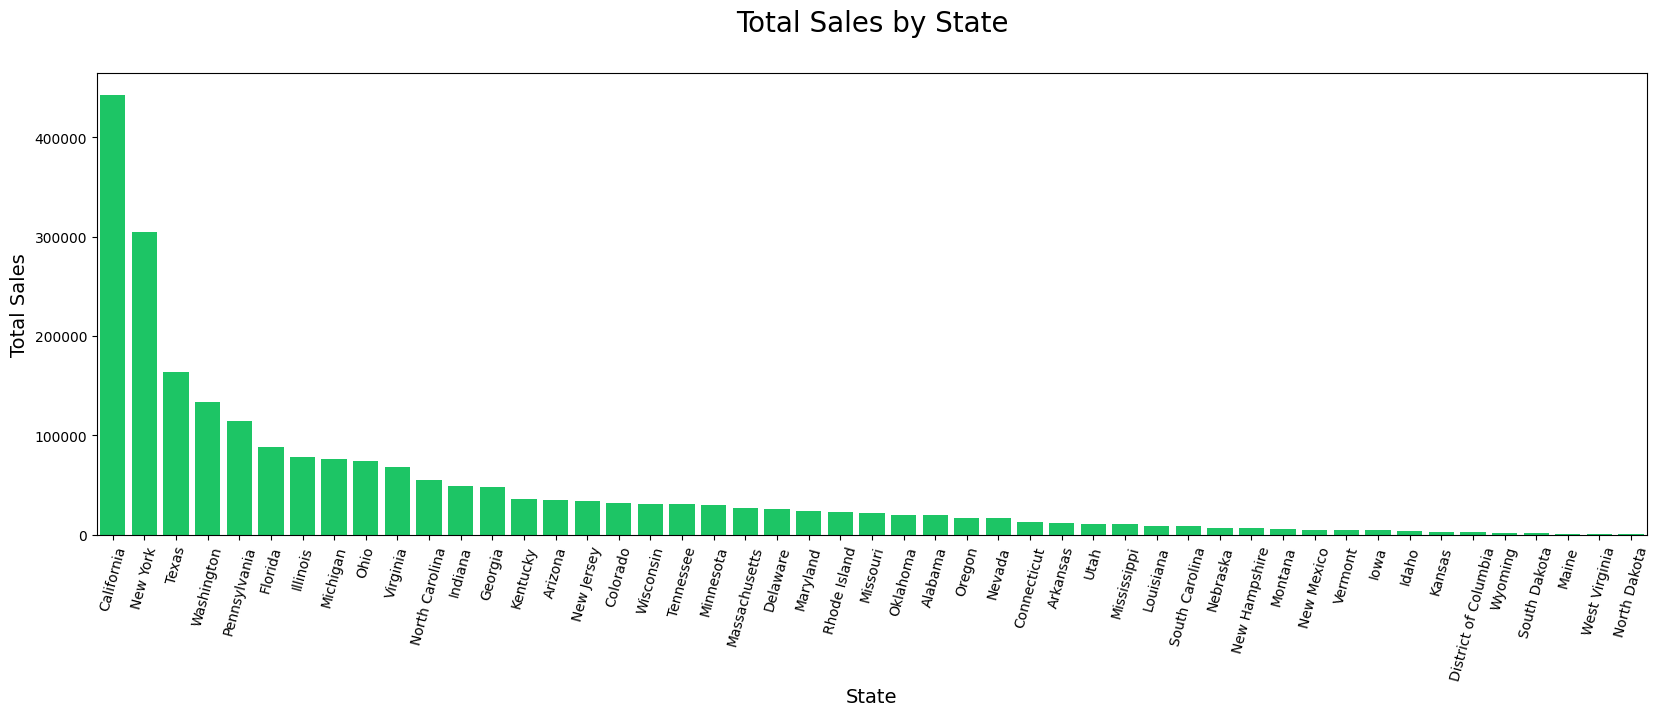

In [ ]:
total_sales_state = df_dsa.groupby('State')['SaleValue'].sum().sort_values(ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(20, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

sns.barplot(data=total_sales_state,
            y='SaleValue',
            x='State',
            ax=ax, color='#01E161')

ax.set_xlabel('State', color='black', fontsize=14)
ax.set_ylabel('Total Sales', color='black', fontsize=14)
ax.set_title('Total Sales by State', color='black', fontsize=20, pad=30)
ax.tick_params(axis='x', color='black', rotation=75, labelcolor='black')
ax.tick_params(axis='y', color='black', labelcolor='black')

plt.show()

# **What Are the Top 10 Cities with the Highest Total Sales?**

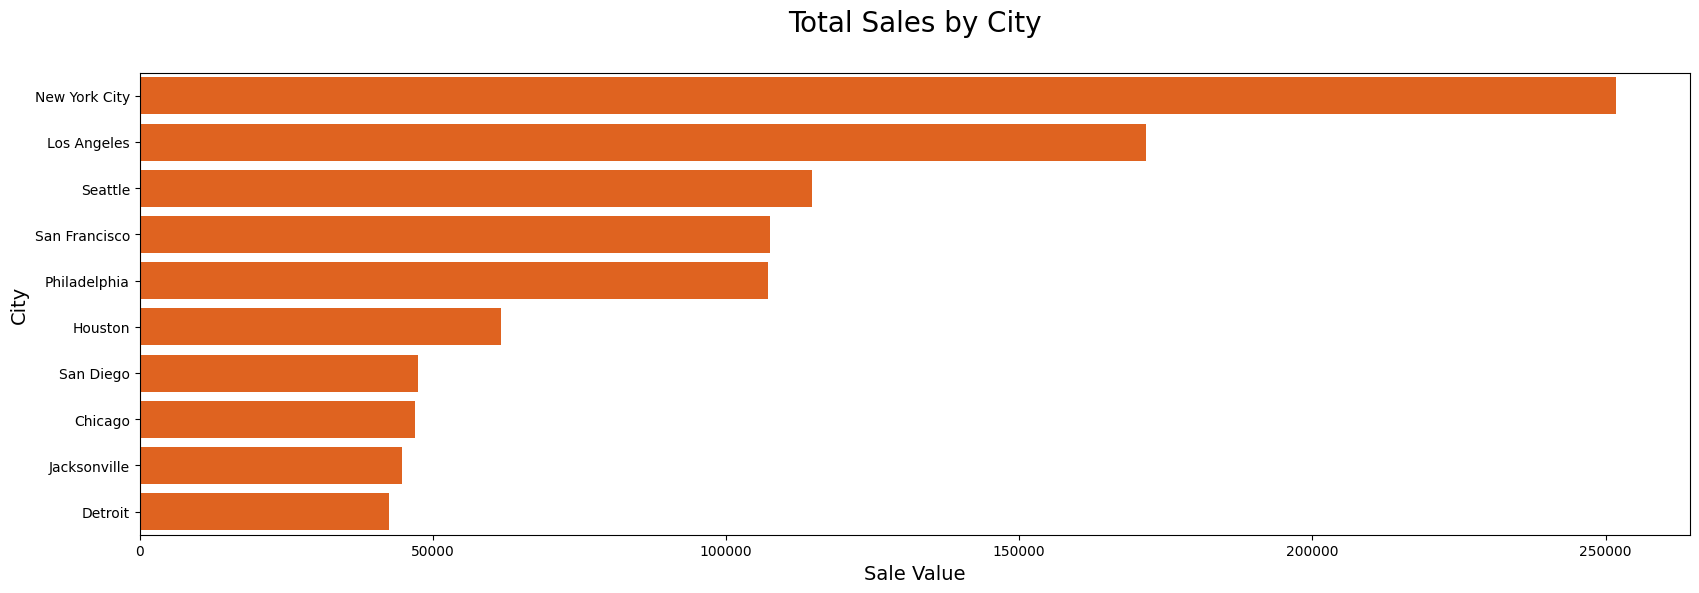

In [ ]:
total_sales_city = df_dsa.groupby('City')['SaleValue'].sum().sort_values(ascending=False).reset_index()
fig, ax = plt.subplots(figsize=(20, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

sns.barplot(data = total_sales_city,
            y = 'City',
            x = 'SaleValue',
            ax = ax,
            color = '#FF5900', order=total_sales_city.head(10)['City']).set_title('Total Sales by City', color = 'black', fontsize = 20, pad = 30)
ax.set_xlabel('Sale Value', color = 'black', fontsize = 14)
ax.set_ylabel('City', color = 'black', fontsize = 14)

ax.tick_params(axis='x', color='black', labelcolor='black')
ax.tick_params(axis='y', color='black',labelcolor='black')

plt.show()

# **Which Segment Had the Highest Total Sales?**

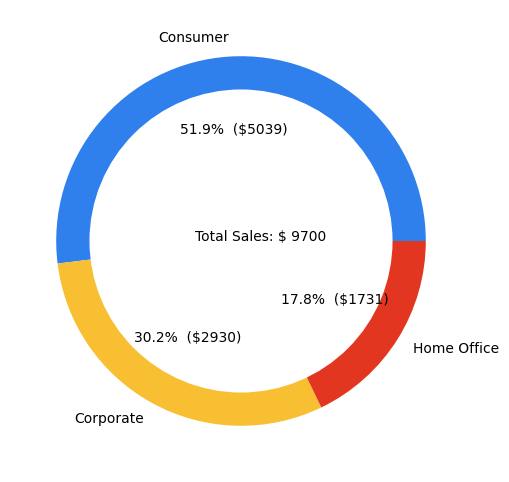

In [ ]:
total_sales_segment = df_dsa.groupby('Segment')['SaleValue'].count().sort_values(ascending=False).reset_index()
color = ['#2F80ED','#F8BF33','#E33621']
plt.figure(figsize=(6,6))
plt.pie(total_sales_segment['SaleValue'], labels=total_sales_segment['Segment'],  autopct = autopct_format(total_sales_segment['SaleValue']), colors=color) # show labels
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white') # clean the circle
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total Sales: ' + '$ ' + str(int(sum(total_sales_segment['SaleValue']))), xy = (-0.25, 0)) # format labels
plt.show()


# **What is the Total Sales by Segment and by Year?**

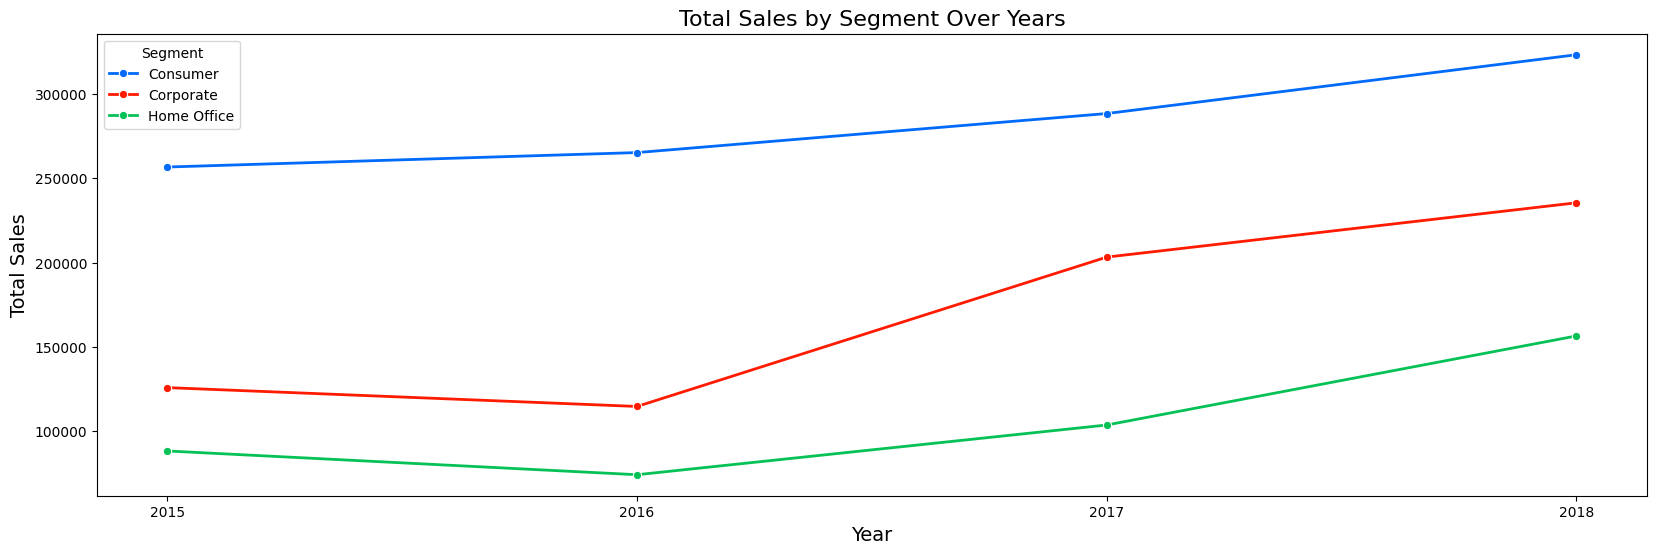

In [ ]:
total_sales_segment_year = df_dsa.groupby(['Segment', 'OrderDate'])['SaleValue'].sum().reset_index()
total_sales_segment_year['OrderDate'] = pd.to_datetime(total_sales_segment_year['OrderDate'], format='%d/%m/%Y')
total_sales_segment_year['Year'] = total_sales_segment_year['OrderDate'].dt.year
total_sales_segment_year = total_sales_segment_year.groupby(['Segment', 'Year'])['SaleValue'].sum().reset_index()

plt.figure(figsize=(20, 6))
plt.gca().set_facecolor('white')
color = ['#006AF9','#FF1B00','#06C156']

sns.lineplot(
    data=total_sales_segment_year,
    x='Year',
    y='SaleValue',
    hue='Segment',
    marker='o',
    linewidth=2,
    palette=color)
plt.xlabel('Year', color='black', fontsize=14)
plt.ylabel('Total Sales', color='black', fontsize=14)
plt.title('Total Sales by Segment Over Years', color='black', fontsize=16)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

 The company's managers are considering offering different discount tiers and would like to run a simulation based on the following rule:

If the SaleValue is greater than 1000, a 15% discount is applied.

*   If the SaleValue is greater than 1000, a 15% discount is applied.
*   If the SaleValue is less than 1000, a 10% discount is applied.

# **How Many Sales Would Receive a 15% Discount?**

In [ ]:
total_sales_15_discount = df_dsa.loc[df_dsa['SaleValue']>1000]
total_sales_10_discount = df_dsa.loc[df_dsa['SaleValue']<1000]

qtd_15_discount = total_sales_15_discount['SaleValue'].count()
qtd_10_discount = total_sales_10_discount['SaleValue'].count()

print(f'{qtd_15_discount} sales would receive 15% of discount and {qtd_10_discount} sales would receive 10% of discount.')

457 sales would receive 15% of discount and 9243 sales would receive 10% of discount.


# **If the Company Decides to Apply the 15% Discount Mentioned Earlier, What Would Be the Average Sale Value Before and After the Discount?**

In [ ]:
total_sales_15_discount = df_dsa.loc[df_dsa['SaleValue']>1000]
total_sales_mean = total_sales_15_discount['SaleValue'].mean()
total_sales_mean_discount = total_sales_15_discount['SaleValue'].mean() * 0.85


print(f'The mean before the discount would be {total_sales_mean:.2f} and after {total_sales_mean_discount:.2f}')

The mean before the discount would be 2116.81 and after 1799.29


# **What is the Average Sales by Segment, by Year, and by Month?**

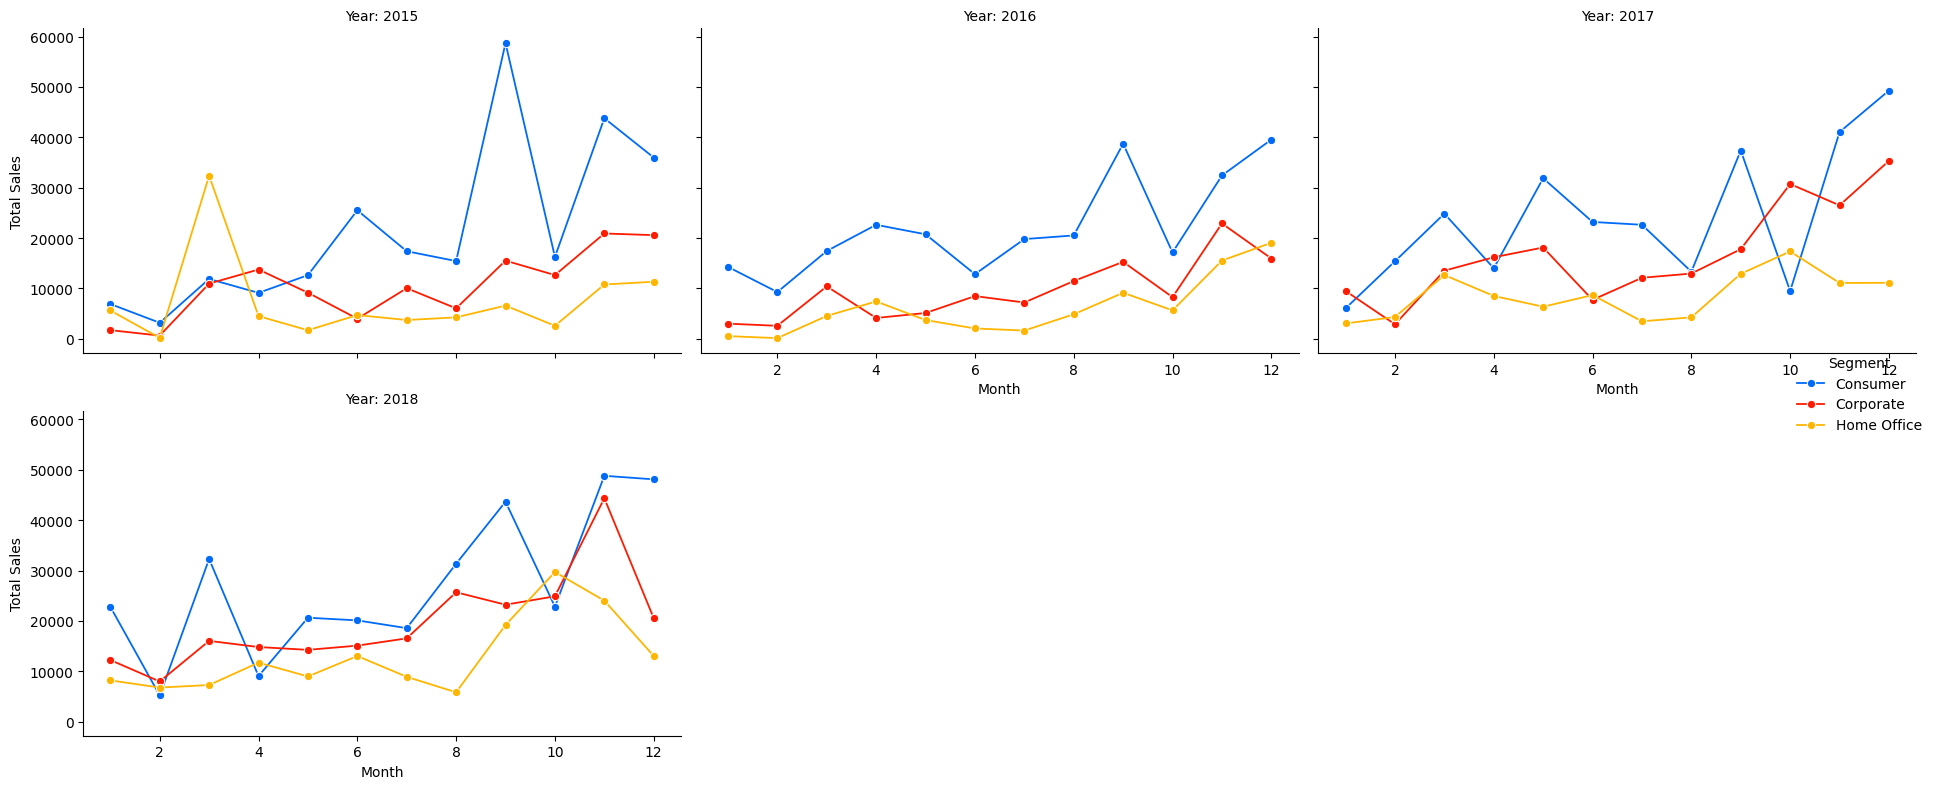

In [ ]:
total_sales_segment_year = df_dsa.groupby(['Segment', 'OrderDate'])['SaleValue'].sum().reset_index()
total_sales_segment_year['OrderDate'] = pd.to_datetime(total_sales_segment_year['OrderDate'], format='%d/%m/%Y')
total_sales_segment_year['Year'] = total_sales_segment_year['OrderDate'].dt.year
total_sales_segment_year['Month'] = total_sales_segment_year['OrderDate'].dt.month

total_sales_segment_year = total_sales_segment_year.groupby(['Segment', 'Year', 'Month'])['SaleValue'].sum().reset_index()
color = ['#006AF9','#FF1B00','#FFB600']
chart = sns.FacetGrid(total_sales_segment_year, col='Year', col_wrap=3, height=4, aspect=1.5)
chart.map_dataframe(sns.lineplot, x='Month', y='SaleValue', hue='Segment', marker='o', linewidth=1.3, palette=color)

chart.set_titles("Year: {col_name}")
chart.set_axis_labels("Month", "Total Sales")
chart.add_legend(title="Segment")
plt.tight_layout()

plt.show()

# **What is the Total Sales by Category and Subcategory, Considering Only the Top 12 Subcategories?**
## Demonstrate everything through a single graph.

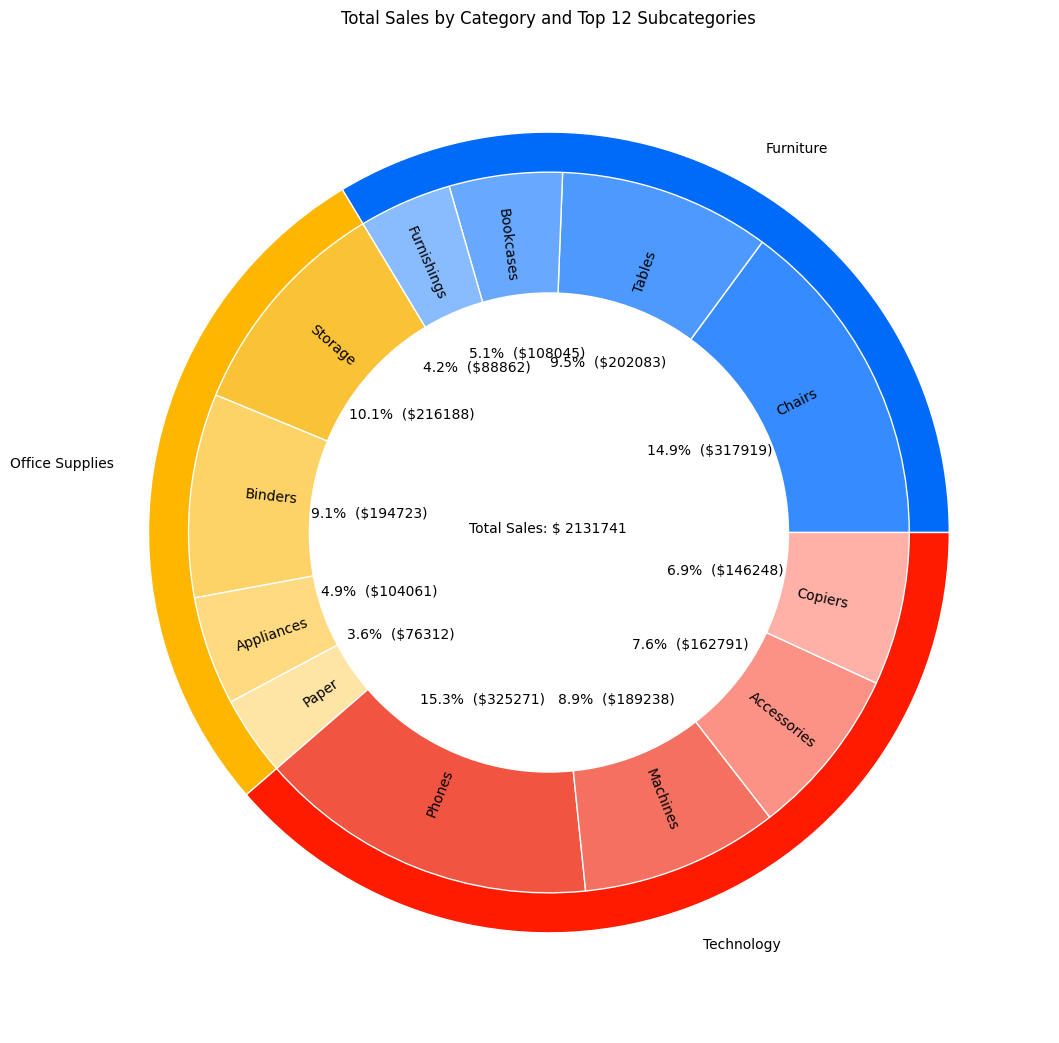

In [ ]:
df_dsa_p10 = df_dsa.groupby(['Category','Subcategory']).sum(numeric_only = True).sort_values('SaleValue',ascending = False).head(12) #groupby the top 12
df_dsa_p10 = df_dsa_p10[['SaleValue']].astype(int).sort_values(by = 'Category').reset_index()
df_dsa_p10_cat = df_dsa_p10.groupby('Category').sum(numeric_only = True).reset_index()
colors_cat = ['#006AF9','#FFB600','#FF1B00']
colors_subcategories = ['#358BFF','#4D99FE','#68A8FF','#89BBFF','#FAC237','#FDD267','#FFDA80','#FFE5A5','#F15542','#F47061','#FC9285','#FFB0A7']
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  (${v:d})'.format(p=pct,v=val)
    return my_format  # format to bring the percentual and the value

fig, ax = plt.subplots(figsize = (16,13))
p1 = ax.pie(df_dsa_p10_cat['SaleValue'],
            radius = 1,
            labels = df_dsa_p10_cat['Category'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = colors_cat)

p2 = ax.pie(df_dsa_p10['SaleValue'],
            radius = 0.9,
            labels = df_dsa_p10['Subcategory'],
            autopct = autopct_format(df_dsa_p10['SaleValue']),
            colors = colors_subcategories,
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'),
            pctdistance = 0.5,
            rotatelabels = True)

central_circle = plt.Circle((0, 0), 0.6, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.annotate(text = 'Total Sales: ' + '$ ' + str(int(sum(df_dsa_p10['SaleValue']))), xy = (-0.2, 0))
plt.title('Total Sales by Category and Top 12 Subcategories')
plt.show()